In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
df <- read_csv("../data/pitchfork/meta_df.csv")

Rows: 23034 Columns: 8
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (6): artist, album, reviewer, genre, label, reviewed
dbl (2): rating, review_n_tokens

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
df %>% head()

artist,album,rating,reviewer,genre,label,reviewed,review_n_tokens
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>
Joni Mitchell,Joni Mitchell at Newport,6.0,Grayson Haver Currin,Rock,Rhino,"July 29, 2023",802
The Clientele,I Am Not There Anymore,8.0,Marc Hogan,Rock,Merge,"July 28, 2023",803
Nas,Magic 2,6.5,Dylan Green,Rap,Mass Appeal,"July 28, 2023",799
Beverly Glenn-Copeland,The Ones Ahead,8.0,Jesse Dorris,Experimental,Transgressive,"July 28, 2023",790
Damon Locks,New Future City Radio,6.9,Matthew Blackwell,Jazz / Experimental,International Anthem,"July 28, 2023",873
DJ K,PANICO NO SUBMUNDO,7.9,Nadine Smith,Experimental,Nyege Nyege Tapes,"July 27, 2023",761


In [35]:
options(repr.plot.width = 16, repr.plot.height = 8, repr.plot.res = 100)

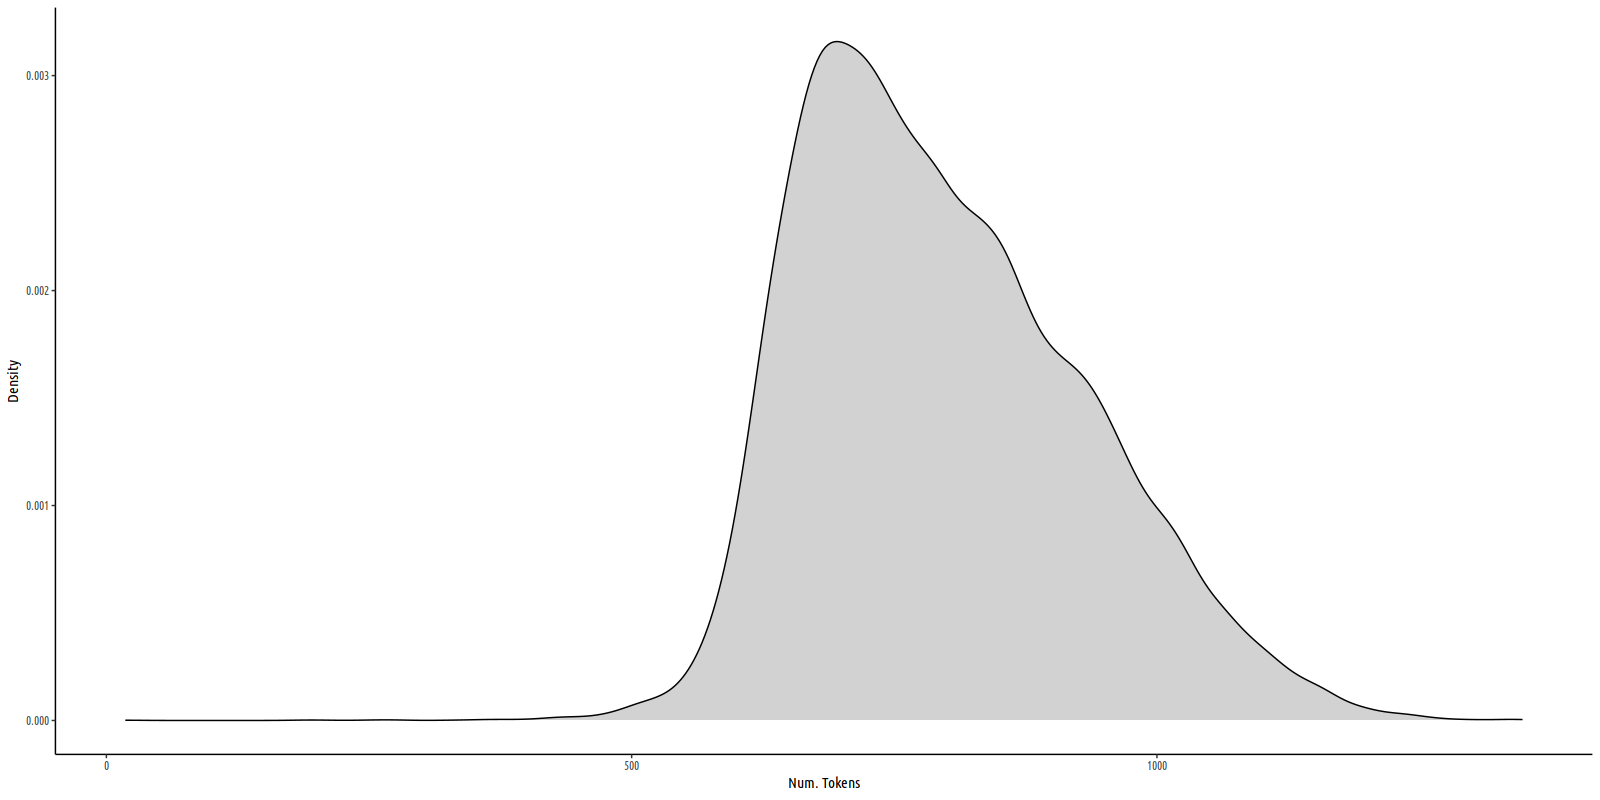

In [118]:
df %>%
    ggplot() +
    # geom_histogram(aes(review_n_tokens), binwidth=25, alpha=0.7) +
    geom_density(aes(review_n_tokens), alpha=0.7, fill="gray") +
    theme_classic() +
    xlab("Num. Tokens") +
    ylab("Density")

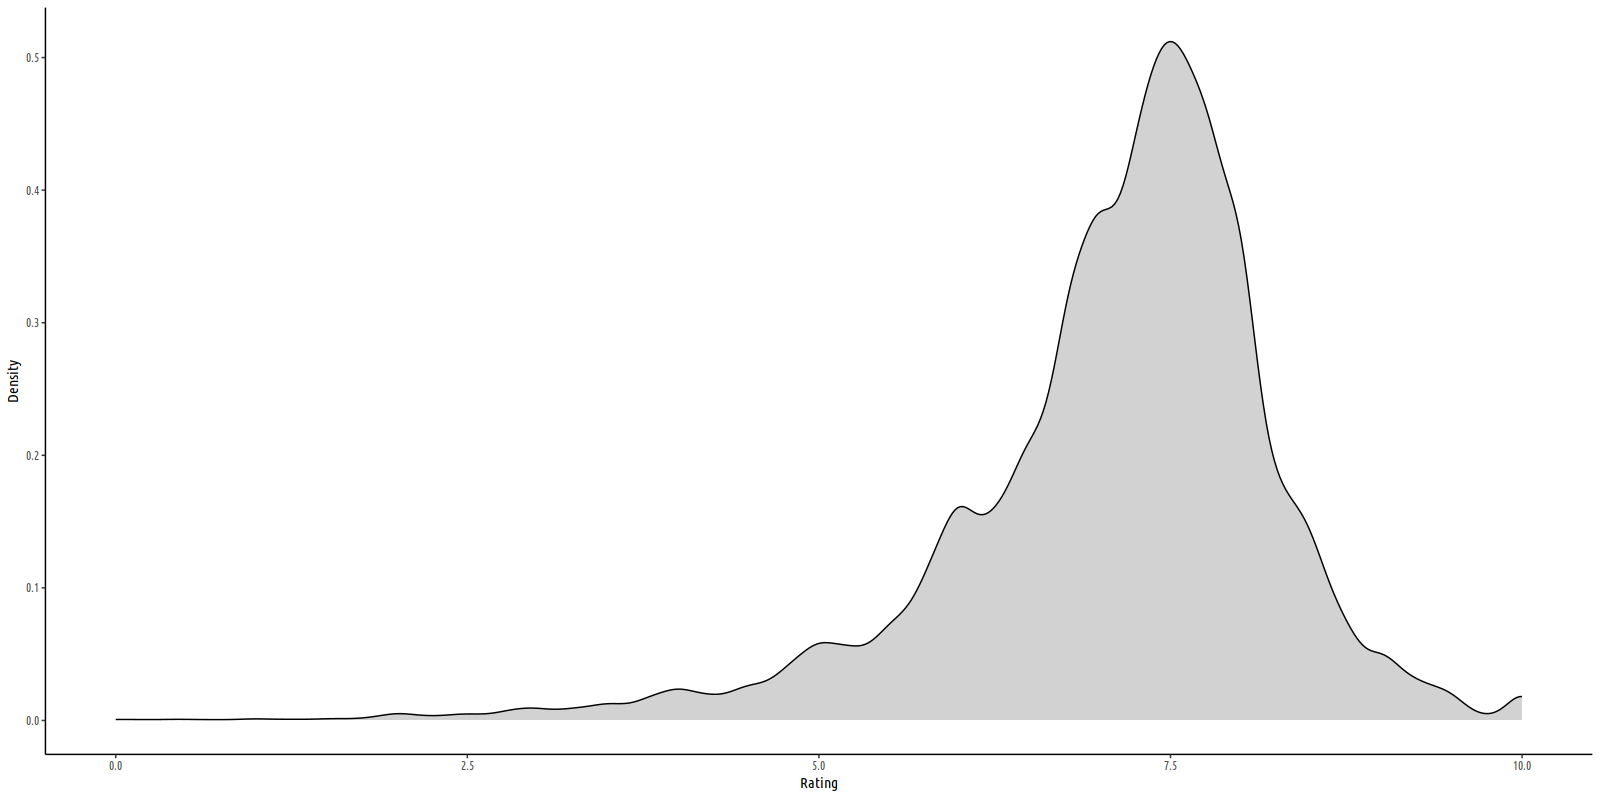

In [119]:
df %>%
    ggplot() +
    # geom_histogram(aes(rating), binwidth=0.2, alpha=0.7) +
    geom_density(aes(rating), alpha=0.7, fill="gray") +
    theme_classic() +
    xlab("Rating") +
    ylab("Density")

In [56]:
df %>%
    distinct(artist) %>%
    nrow()

[1] 10242

In [60]:
df %>%
    nrow()

[1] 23034

In [61]:
df %>%
    distinct(artist, album) %>%
    nrow()

[1] 22053

In [70]:
df %>%
    add_count(album, artist) %>%
    filter(n > 1) %>%
    arrange(album, artist)

artist,album,rating,reviewer,genre,label,reviewed,review_n_tokens,n
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>
Crystal Castles,(III),8.0,Ian Cohen,Electronic,Fiction / Casablanca / Universal Republic,"November 12, 2012",1074,2
Crystal Castles,(III),8.0,Ian Cohen,Electronic,Fiction / Casablanca / Universal Republic,"November 12, 2012",1074,2
Forgotten Tomb,...And Don't Deliver Us From Evil,7.5,Kim Kelly,NA,Agonia,"December 4, 2012",759,2
Forgotten Tomb,...And Don't Deliver Us From Evil,7.5,Kim Kelly,NA,Agonia,"December 4, 2012",759,2
Four Tet,0181,7.3,Puja Patel,Electronic,Text,"February 1, 2013",706,2
Four Tet,0181,7.3,Puja Patel,Electronic,Text,"February 1, 2013",706,2
Sonny Smith,100 Records Vol. 3,7.4,Evan Minsker,Rock,Polyvinyl / Glitter End,"February 5, 2013",810,2
Sonny Smith,100 Records Vol. 3,7.4,Evan Minsker,Rock,Polyvinyl / Glitter End,"February 5, 2013",810,2
Trash Talk,119,7.4,Steven Hyden,Metal,Odd Future,"October 11, 2012",818,2


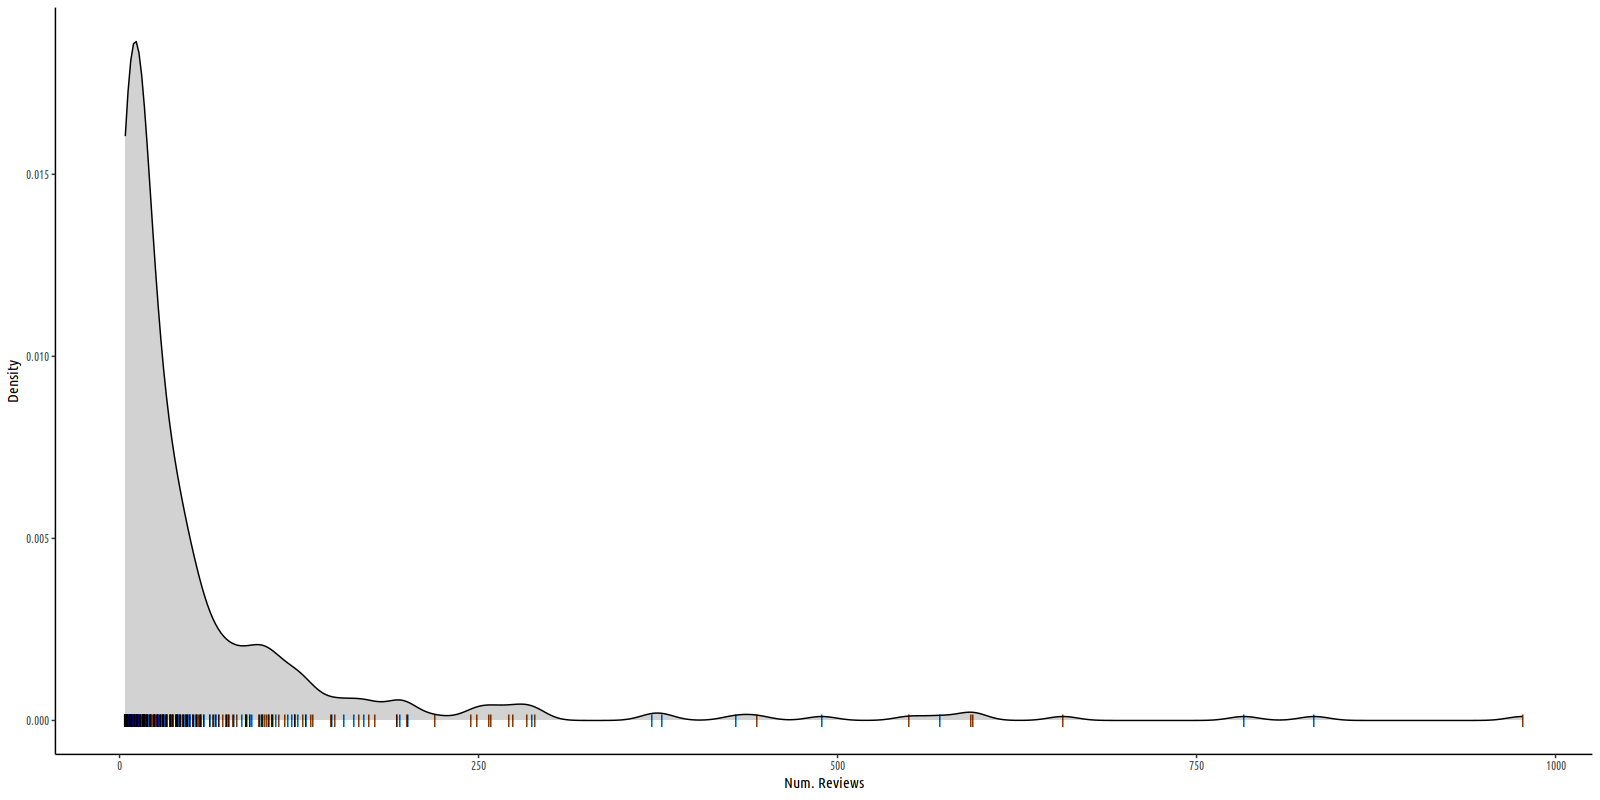

In [102]:
df %>%
    count(reviewer, name="n_reviews") %>%
    # group_by(reviewer) %>%
    # summarize(mean_rating = mean(rating), n_ratings = n()) %>%
    filter(n_reviews > 3) %>%
    ggplot() +
    geom_density(aes(n_reviews), alpha=0.7, fill="gray") +
    geom_point(aes(x=n_reviews, y=0), shape="|", size=3) +
    theme_classic() +
    xlab("Num. Reviews") +
    ylab("Density")

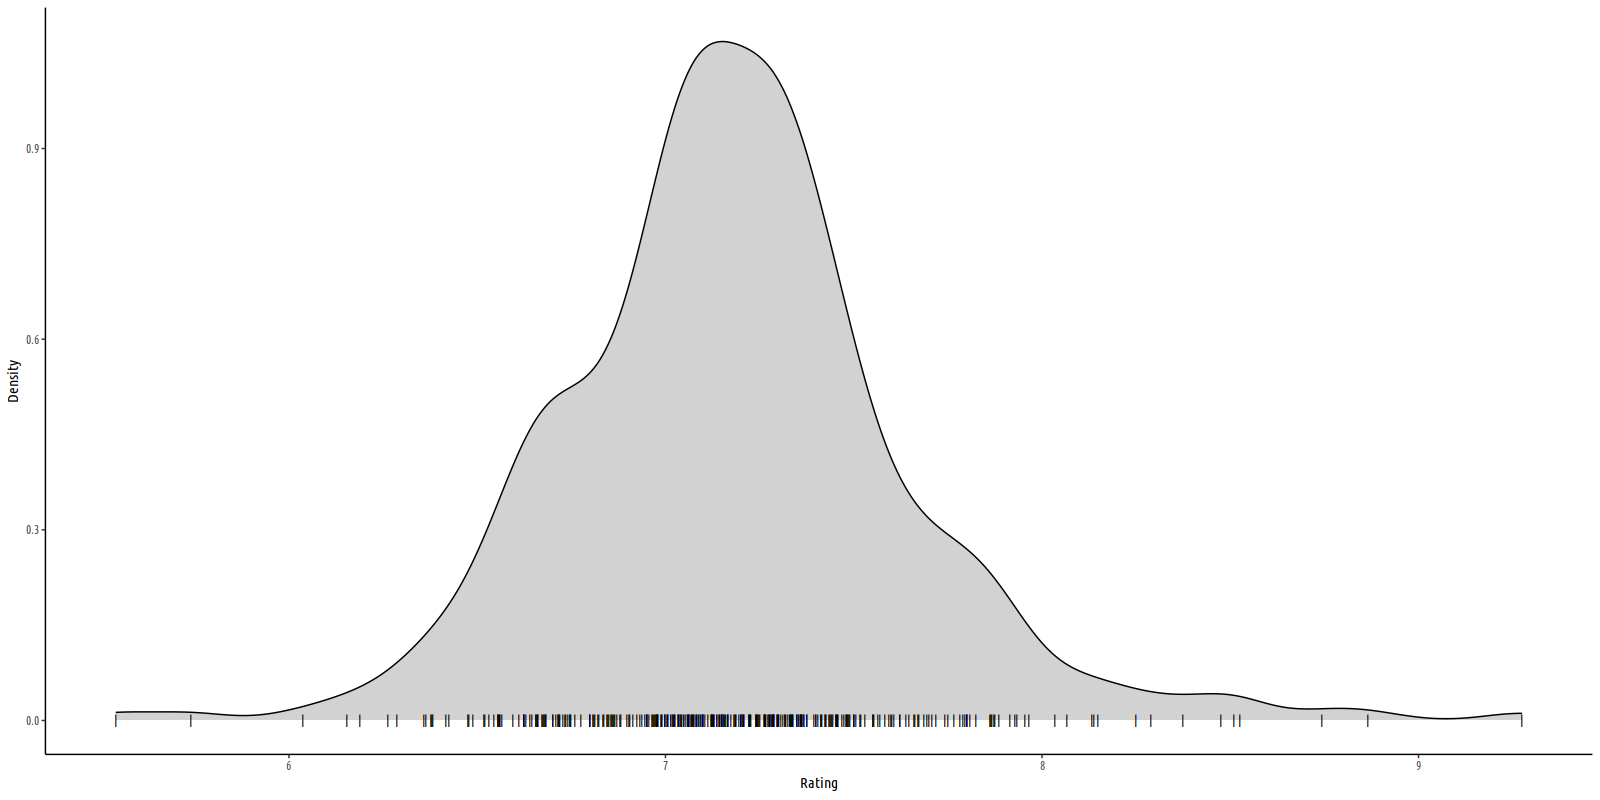

In [101]:
df %>%
    group_by(reviewer) %>%
    summarize(mean_rating = mean(rating), n_ratings = n()) %>%
    filter(n_ratings > 3) %>%
    ggplot() +
    geom_density(aes(mean_rating), alpha=0.7, fill="gray") +
    geom_point(aes(x=mean_rating, y=0), shape="|", size=3) +
    theme_classic() +
    xlab("Rating") +
    ylab("Density")

In [84]:
df %>%
    group_by(reviewer) %>%
    summarize(mean_rating = mean(rating), n_ratings = n()) %>%
    filter(n_ratings > 3) %>%
    arrange(mean_rating)

reviewer,mean_rating,n_ratings
<chr>,<dbl>,<int>
Jonathan Garrett,5.540000,5
Maud Deitch,5.740000,5
Dani Blum,6.037288,59
Adam Moerder,6.154135,133
Jia Tolentino,6.188889,9
Trey Alston,6.262500,8
Julia Gray,6.287500,8
Joshua Love,6.359813,107
Rob Mitchum,6.365251,259
